In [6]:
import pandas as pd
import random
import numpy as np

random_seed = 1998

random.seed(random_seed) # 设置Python全局的random种子
np.random.seed(random_seed)  # 设置numpy的随机种子   

In [158]:
df = pd.read_parquet('data230711.parquet')
df_0 = df[df['landslide'] == 0].sample(97,replace=False) #replace=False时，函数在进行采样时会确保每个元素只被选择一次
df_1 = df[df['landslide'] == 1].sample(97,replace=False)
data = pd.concat([df_0,df_1],axis=0)

# heatmap 相关数据库导入

In [9]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

使用pandas的corr函数计算相关性系数

In [166]:
corr = data.corr()

制作热力图

In [94]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list('custom_colors', 
    [(235/255,111/255,93/255),
     (113/255,201/255,221/255),
     (51/255,179/255,159/255),
     (99/255,118/255,160/255),
     (245/255,175/255,152/255)], N=200)

[Text(0.5, 1, 'Aspect'),
 Text(1.5, 1, 'Dem'),
 Text(2.5, 1, 'Distance from faults'),
 Text(3.5, 1, 'Landform'),
 Text(4.5, 1, 'Landslide'),
 Text(5.5, 1, 'Landuse'),
 Text(6.5, 1, 'Plan Curvature'),
 Text(7.5, 1, 'Profile Curvature'),
 Text(8.5, 1, 'Average Rainfall'),
 Text(9.5, 1, 'Distance from rivers'),
 Text(10.5, 1, 'Slope'),
 Text(11.5, 1, 'TWI')]

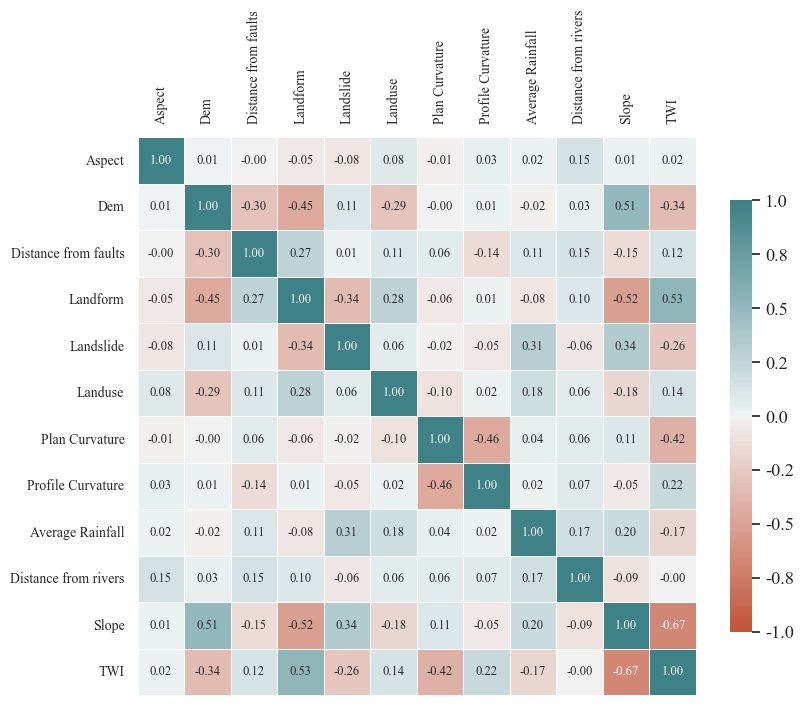

In [133]:
# 设置图形大小 
plt.rcParams['figure.figsize'] = 9,8
plt.rcParams['font.family'] = 'Times New Roman'
# 设置seaborn 全局参数 (使用颜色代码来表示调色板，图形中的文字将以比默认情况下稍大的尺寸显示。)
sns.set(color_codes=True,font_scale=1.2,font = 'Times New Roman')  

#heatmap
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True,annot_kws={'size':9},fmt='.2f',
                 cmap = sns.diverging_palette(20,200,n=200),cbar_kws={'shrink':.7,'format':"%.1f"},
                 linewidths=.5,square=True)
ax.set_yticklabels(a,size=10)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_ticks_position("none")
ax.set_xticklabels(a,rotation = 90,size=10)

# 使用heatmapz库制作大小改变的热力图

In [21]:
from heatmap import corrplot

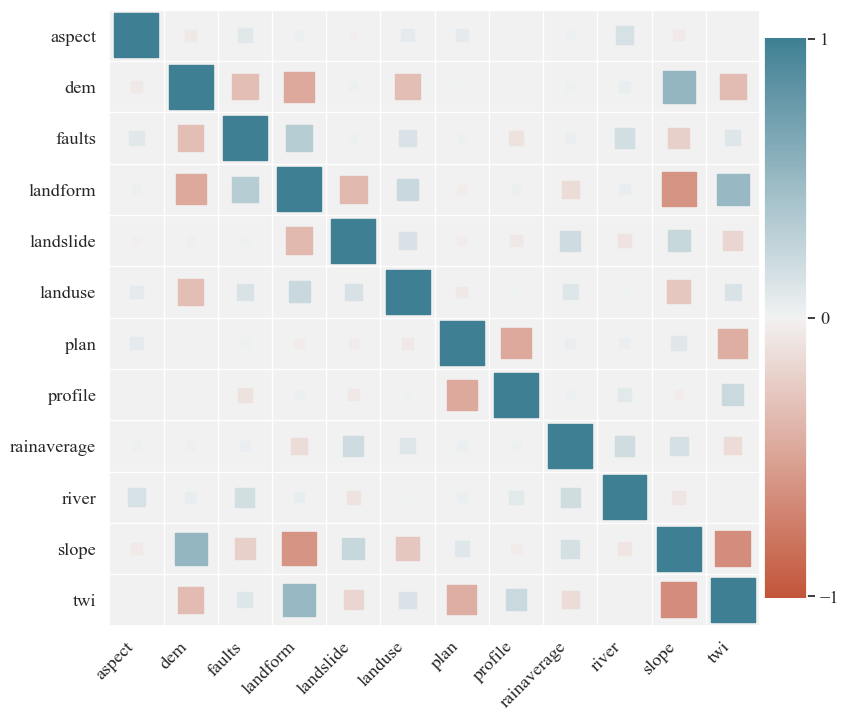

In [169]:
# 设置图形大小 
plt.rcParams['figure.figsize'] = 9,8
plt.rcParams['font.family'] = 'Times New Roman'
# 设置seaborn 全局参数 (使用颜色代码来表示调色板，图形中的文字将以比默认情况下稍大的尺寸显示。)
sns.set(color_codes=True,font_scale=1.2,font = 'Times New Roman')  

corrplot(corr,size_scale=1000)